# Nutrition Analysis Tour
## Method: Descriptive statistics & exploratory analysis on cleaned .csv file
## Language/tool: Python Pandas & Matplolib

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Bring up cleaned data set
sb_desc = pd.read_csv("sb_clean.csv")
sb_desc.head()

,category,name,size_oz,milk_type,calories,calories_%dv,caffeine_mg,caffeine_%dv,total_fat_g,fat_%dv,...,carbs_g,chol_mg,fiber_g,sugars_g,sugars_%dv,protein_g,vit_a_%dv,vit_c_%dv,calcium_%dv,iron_%dv
0,Classic Espresso Drinks,Caffè Latte,8,Nonfat,70,4.0,75,19.0,0.0,0.0,...,75,10,0,9,18.0,6.0,10,0,20,0
1,Classic Espresso Drinks,Caffè Latte,8,2%,100,5.0,75,19.0,4.0,4.0,...,85,10,0,9,18.0,6.0,10,0,20,0
2,Classic Espresso Drinks,Caffè Latte,8,Soy,70,4.0,75,19.0,2.0,3.0,...,65,6,1,4,8.0,5.0,6,0,20,8
3,Classic Espresso Drinks,Caffè Latte,12,Nonfat,100,5.0,75,19.0,0.0,0.0,...,120,15,0,14,28.0,10.0,15,0,30,0
4,Classic Espresso Drinks,Caffè Latte,12,2%,150,8.0,75,19.0,6.0,8.0,...,135,15,0,14,28.0,10.0,15,0,30,0


### Analyzing average nutrition values for each drink category, for 16 ounce (Grande) drinks

In [3]:
# Create a dataframe containing only 16oz drinks
grande = sb_desc[sb_desc["size_oz"] == 16]
grande

,category,name,size_oz,milk_type,calories,calories_%dv,caffeine_mg,caffeine_%dv,total_fat_g,fat_%dv,...,carbs_g,chol_mg,fiber_g,sugars_g,sugars_%dv,protein_g,vit_a_%dv,vit_c_%dv,calcium_%dv,iron_%dv
6,Classic Espresso Drinks,Caffè Latte,16,Nonfat,130,6.0,150,38.0,0.0,0.0,...,150,19,0,18,36.0,13.0,20,0,40,0
7,Classic Espresso Drinks,Caffè Latte,16,2%,190,10.0,150,38.0,7.0,9.0,...,170,19,0,17,34.0,12.0,20,2,40,0
8,Classic Espresso Drinks,Caffè Latte,16,Soy,150,8.0,150,38.0,5.0,6.0,...,130,13,1,8,16.0,10.0,15,0,40,15
18,Classic Espresso Drinks,Caffè Mocha (Without Whipped Cream),16,Nonfat,220,11.0,175,44.0,2.0,3.0,...,125,43,2,34,68.0,13.0,20,0,35,25
19,Classic Espresso Drinks,Caffè Mocha (Without Whipped Cream),16,2%,260,13.0,175,44.0,8.0,10.0,...,140,42,2,34,68.0,13.0,15,2,35,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,Frappuccino® Light Blended Coffee,Caramel,16,Nonfat,150,8.0,90,22.0,0.0,0.0,...,200,33,0,32,64.0,3.0,6,0,10,0
206,Frappuccino® Light Blended Coffee,Java Chip,16,Nonfat,220,11.0,105,26.0,4.0,5.0,...,240,43,2,39,78.0,5.0,6,0,10,25
210,Classic Espresso Drinks,Skinny Latte (Any Flavour),16,Nonfat,120,6.0,150,38.0,0.0,0.0,...,160,18,0,16,32.0,12.0,20,0,35,0
214,Signature Espresso Drinks,Caramel Apple Spice (Without Whipped Cream),16,NaN,280,14.0,0,0.0,0.0,0.0,...,20,70,0,65,130.0,0.0,0,0,0,0


In [4]:
# Then group by category and apply mean, stdev, median functions
result = grande.groupby("category").agg(avg_cal = ("calories_%dv", "mean"), sd_cal = ("calories_%dv", "std"), med_cal = ("calories_%dv", "median"),
                               avg_caff = ("caffeine_%dv", "mean"), sd_caff = ("caffeine_%dv", "std"), med_caff = ("caffeine_%dv", "median"),
                               avg_fat = ("fat_%dv", "mean"), sd_fat = ("fat_%dv", "std"), med_fat = ("fat_%dv", "median"),
                               avg_sug = ("sugars_%dv", "mean"), sd_sug = ("sugars_%dv", "std"), med_sug = ("sugars_%dv", "median"))
result

,avg_cal,sd_cal,med_cal,avg_caff,sd_caff,med_caff,avg_fat,sd_fat,med_fat,avg_sug,sd_sug,med_sug
category,,,,,,,,,,,,
Classic Espresso Drinks,8.142857,3.548719,9.0,40.571429,5.109784,38.0,4.285714,3.831621,4.5,39.142857,24.238739,35.0
Coffee,0.000000,NaN,0.0,82.000000,NaN,82.0,0.000000,NaN,0.0,0.000000,NaN,0.0
Frappuccino® Blended Coffee,13.666667,1.922751,13.5,25.750000,2.988615,26.5,3.583333,2.874918,3.5,112.666667,9.847319,116.0
Frappuccino® Blended Crème,12.250000,0.500000,12.0,0.000000,0.000000,0.0,2.000000,2.449490,1.5,104.000000,4.898979,104.0
Frappuccino® Light Blended Coffee,8.250000,2.061553,8.0,24.000000,1.632993,24.0,1.500000,2.380476,0.5,63.500000,10.878113,62.0
Shaken Iced Beverages,5.500000,1.000000,6.0,31.250000,7.762087,31.0,0.750000,0.957427,0.5,45.500000,3.000000,46.0
Signature Espresso Drinks,14.000000,3.527668,13.0,24.600000,17.385818,38.0,7.500000,4.927248,8.5,86.800000,27.716020,82.0
Smoothies,14.000000,0.500000,14.0,1.777778,2.108185,0.0,3.000000,1.870829,3.0,73.555556,6.912147,74.0
Tazo® Tea Drinks,11.888889,3.480102,11.0,14.666667,11.135529,20.0,4.222222,3.492054,4.0,81.111111,21.705094,84.0


In [5]:
# Remove NaN values
result.loc["Coffee", ["sd_cal", "sd_caff", "sd_fat", "sd_sug"]] = 0
result

,avg_cal,sd_cal,med_cal,avg_caff,sd_caff,med_caff,avg_fat,sd_fat,med_fat,avg_sug,sd_sug,med_sug
category,,,,,,,,,,,,
Classic Espresso Drinks,8.142857,3.548719,9.0,40.571429,5.109784,38.0,4.285714,3.831621,4.5,39.142857,24.238739,35.0
Coffee,0.000000,0.000000,0.0,82.000000,0.000000,82.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
Frappuccino® Blended Coffee,13.666667,1.922751,13.5,25.750000,2.988615,26.5,3.583333,2.874918,3.5,112.666667,9.847319,116.0
Frappuccino® Blended Crème,12.250000,0.500000,12.0,0.000000,0.000000,0.0,2.000000,2.449490,1.5,104.000000,4.898979,104.0
Frappuccino® Light Blended Coffee,8.250000,2.061553,8.0,24.000000,1.632993,24.0,1.500000,2.380476,0.5,63.500000,10.878113,62.0
Shaken Iced Beverages,5.500000,1.000000,6.0,31.250000,7.762087,31.0,0.750000,0.957427,0.5,45.500000,3.000000,46.0
Signature Espresso Drinks,14.000000,3.527668,13.0,24.600000,17.385818,38.0,7.500000,4.927248,8.5,86.800000,27.716020,82.0
Smoothies,14.000000,0.500000,14.0,1.777778,2.108185,0.0,3.000000,1.870829,3.0,73.555556,6.912147,74.0
Tazo® Tea Drinks,11.888889,3.480102,11.0,14.666667,11.135529,20.0,4.222222,3.492054,4.0,81.111111,21.705094,84.0


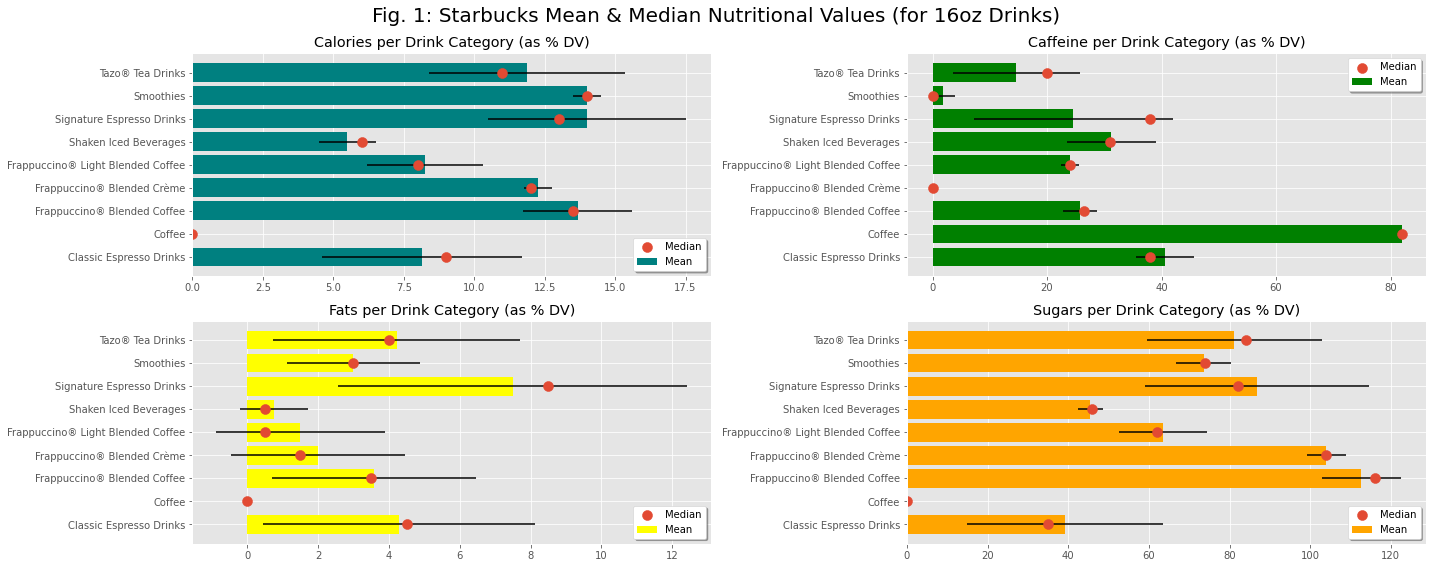

In [22]:
# Plot descriptive stats for the 16oz (Grande) drink categories
plt.style.use('ggplot')
plt.figure(figsize=(20,8))
plt.suptitle("Fig. 1: Starbucks Mean & Median Nutritional Values (for 16oz Drinks)", fontsize=20)

plt.subplot(2,2,1)
plt.title("Calories per Drink Category (as % DV)")
plt.barh(result["avg_cal"].index.values, result["avg_cal"], xerr = result["sd_cal"], color = "teal", zorder = 1)
plt.scatter(result["med_cal"], result["avg_cal"].index.values, s = 100, zorder = 2)
plt.legend(["Median", "Mean"], loc = "lower right", shadow = True, frameon = True, facecolor = "white")

plt.subplot(2,2,2)
plt.title("Caffeine per Drink Category (as % DV)")
plt.barh(result["avg_caff"].index.values, result["avg_caff"], xerr = result["sd_caff"], color = "green", zorder = 1)
plt.scatter(result["med_caff"], result["avg_cal"].index.values, s = 100, zorder = 2)
plt.legend(["Median", "Mean"], loc = "upper right", shadow = True, frameon = True, facecolor = "white")

plt.subplot(2,2,3)
plt.title("Fats per Drink Category (as % DV)")
plt.barh(result["avg_fat"].index.values, result["avg_fat"], xerr = result["sd_fat"], color = "yellow", zorder = 1)
plt.scatter(result["med_fat"], result["avg_cal"].index.values, s = 100, zorder = 2)
plt.legend(["Median", "Mean"], loc = "lower right", shadow = True, frameon = True, facecolor = "white")

plt.subplot(2,2,4)
plt.title("Sugars per Drink Category (as % DV)")
plt.barh(result["avg_sug"].index.values, result["avg_sug"], xerr = result["sd_sug"], color = "orange", zorder = 1)
plt.scatter(result["med_sug"], result["avg_cal"].index.values, s = 100, zorder = 2)
plt.legend(["Median", "Mean"], loc = "lower right", shadow = True, frameon = True, facecolor = "white")

plt.tight_layout()

#### Conclusions:
+  Signature Espresso and Tazo Tea Drinks contain high variability in each assayed nutrition type
+  Overall, no drink category contributes greatly to fat or calorie % DV intake, but you can easily obtain your 100% DV for sugar from 4 different drink categories
+  You need roughly 3 Frappuccino Light Blended Coffees to equal the caffeine in 1 Coffee...but then achieve >180% of DV for sugar

### Analyzing min & max nutrition values for each drink category, for 16 ounce drinks

In [7]:
# Min and max calories, caffeine, fat, sugars for each drink category
extremes = grande.groupby("category").agg(min_cal = ("calories_%dv", "min"), max_cal = ("calories_%dv", "max"),
                               min_caff = ("caffeine_%dv", "min"), max_caff = ("caffeine_%dv", "max"),
                               min_fat = ("fat_%dv", "min"), max_fat = ("fat_%dv", "max"),
                               min_sug = ("sugars_%dv", "min"), max_sug = ("sugars_%dv", "max"))
extremes

,min_cal,max_cal,min_caff,max_caff,min_fat,max_fat,min_sug,max_sug
category,,,,,,,,
Classic Espresso Drinks,1.0,13.0,38.0,56.0,0.0,10.0,0.0,70.0
Coffee,0.0,0.0,82.0,82.0,0.0,0.0,0.0,0.0
Frappuccino® Blended Coffee,11.0,17.0,18.0,28.0,0.0,9.0,94.0,124.0
Frappuccino® Blended Crème,12.0,13.0,0.0,0.0,0.0,5.0,98.0,110.0
Frappuccino® Light Blended Coffee,6.0,11.0,22.0,26.0,0.0,5.0,52.0,78.0
Shaken Iced Beverages,4.0,6.0,22.0,41.0,0.0,2.0,42.0,48.0
Signature Espresso Drinks,10.0,20.0,0.0,38.0,0.0,14.0,48.0,130.0
Smoothies,13.0,15.0,0.0,4.0,1.0,6.0,62.0,82.0
Tazo® Tea Drinks,8.0,18.0,0.0,24.0,0.0,10.0,50.0,112.0


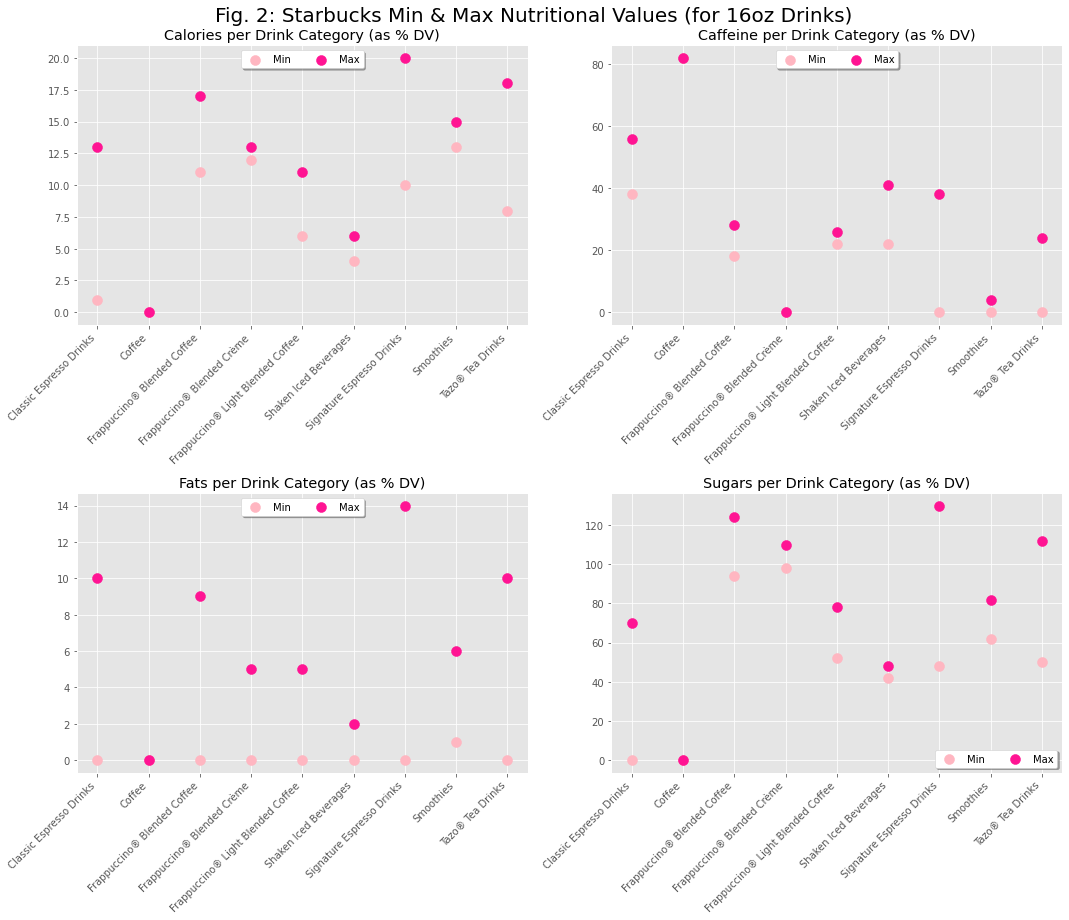

In [25]:
# Plot of min, max nutritional values for the 16oz drink categories
plt.style.use('ggplot')
plt.figure(figsize=(15, 13))
plt.suptitle("Fig. 2: Starbucks Min & Max Nutritional Values (for 16oz Drinks)", fontsize = 20)

plt.subplot(2,2,1)
plt.title("Calories per Drink Category (as % DV)")
plt.scatter(extremes["min_cal"].index.values, extremes["min_cal"], s = 100, color = "lightpink")
plt.scatter(extremes["max_cal"].index.values, extremes["max_cal"], s = 100, color = "deeppink")
plt.legend(["Min", "Max"], loc = "upper center", shadow = True, frameon = True, facecolor = "white", ncol = 2)
plt.xticks(rotation = 45, ha ='right')

plt.subplot(2,2,2)
plt.title("Caffeine per Drink Category (as % DV)")
plt.scatter(extremes["min_caff"].index.values, extremes["min_caff"], s = 100, color = "lightpink")
plt.scatter(extremes["max_caff"].index.values, extremes["max_caff"], s = 100, color = "deeppink")
plt.legend(["Min", "Max"], loc = "upper center", shadow = True, frameon = True, facecolor = "white", ncol = 2)
plt.xticks(rotation = 45, ha ='right')

plt.subplot(2,2,3)
plt.title("Fats per Drink Category (as % DV)")
plt.scatter(extremes["min_fat"].index.values, extremes["min_fat"], s = 100, color = "lightpink")
plt.scatter(extremes["max_fat"].index.values, extremes["max_fat"], s = 100, color = "deeppink")
plt.legend(["Min", "Max"], loc = "upper center", shadow = True, frameon = True, facecolor = "white", ncol = 2)
plt.xticks(rotation = 45, ha ='right')

plt.subplot(2,2,4)
plt.title("Sugars per Drink Category (as % DV)")
plt.scatter(extremes["min_sug"].index.values, extremes["min_sug"], s = 100, color = "lightpink")
plt.scatter(extremes["max_sug"].index.values, extremes["max_sug"], s = 100, color = "deeppink")
plt.legend(["Min", "Max"], loc = "lower right", shadow = True, frameon = True, facecolor = "white", ncol = 2)
plt.xticks(rotation = 45, ha ='right')

plt.tight_layout()

#### Conclusions:
+  Similar to the high standard deviation seen in Fig. 1, Signature Espresso and Tazo Tea Drinks cover a wide range in each assayed nutrition type
+  For Classic Espresso Drinks, there is a wide range of calories, fat, and sugar but caffeine lands at ~40-50% DV

---

### What are the top 5 drinks for a good caffeine hit?

In [9]:
caffy = sb_desc.nlargest(5, ["caffeine_%dv"])
caffy[["category", "name", "size_oz", "caffeine_%dv"]]

,category,name,size_oz,caffeine_%dv
190,Coffee,Brewed Coffee,20,102.0
189,Coffee,Brewed Coffee,16,82.0
194,Classic Espresso Drinks,Caffè Americano,20,75.0
188,Coffee,Brewed Coffee,12,65.0
218,Shaken Iced Beverages,Iced Brewed Coffee (With Classic Syrup),20,59.0


### What are the top 5 drinks for a good sugar hit?

In [10]:
sugga = sb_desc.nlargest(5, ["sugars_%dv"])
sugga[["category", "name", "size_oz", "sugars_%dv"]]
# This lines up well with the high mean, median values seen for the Frappucino Blended Coffee category in Fig. 1

,category,name,size_oz,sugars_%dv
171,Frappuccino® Blended Coffee,Java Chip (Without Whipped Cream),20,168.0
172,Frappuccino® Blended Coffee,Java Chip (Without Whipped Cream),20,168.0
215,Signature Espresso Drinks,Caramel Apple Spice (Without Whipped Cream),20,166.0
173,Frappuccino® Blended Coffee,Java Chip (Without Whipped Cream),20,160.0
162,Frappuccino® Blended Coffee,Caramel (Without Whipped Cream),20,154.0


### Is there a correlation between sugar and caffeine in 16oz drinks?

In [11]:
avg_sug = grande.groupby(["category"])["sugars_%dv"].mean()
avg_caff = grande.groupby(["category"])["caffeine_%dv"].mean()
sd_sug = grande.groupby(["category"])["sugars_%dv"].std()
sd_caff = grande.groupby(["category"])["caffeine_%dv"].std()

C:\Users\nari2\anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
C:\Users\nari2\anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
C:\Users\nari2\anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
C:\Users\nari2\anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


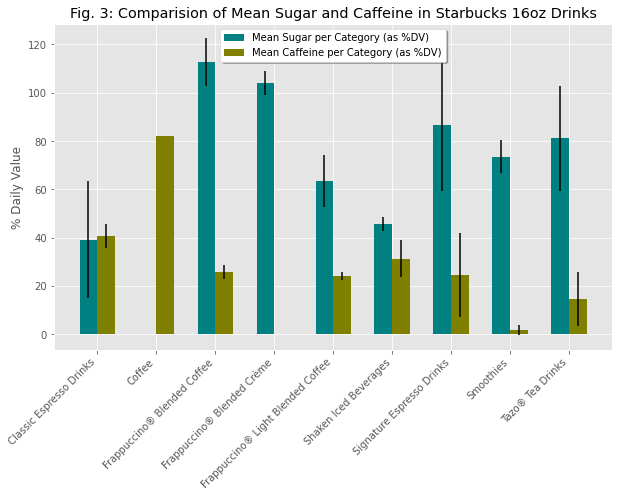

In [26]:
plt.figure(figsize=(10,6))
plt.bar(avg_sug.index.values, avg_sug, yerr = sd_sug, color = "teal", width = -0.3, align = "edge", label = "Mean Sugar per Category (as %DV)")
plt.bar(avg_caff.index.values, avg_caff, yerr = sd_caff, color = "olive", width = 0.3, align = "edge", label = "Mean Caffeine per Category (as %DV)")

plt.title("Fig. 3: Comparision of Mean Sugar and Caffeine in Starbucks 16oz Drinks")
plt.ylabel("% Daily Value")
plt.legend(loc = "upper center", shadow = True, frameon = True, facecolor = "white") 
plt.xticks(rotation = 45, ha ='right')
plt.show()
# Error raised as .std() has default ddof = 1 for sample standard deviation (divisor: N − 1) and the Coffee category contains 1 value

#### Conclusion: 
+ There does not appear to be any correlation between average sugar and average caffeine per drink category

---

### For each 20oz (Venti) drink that has a milk value, is there an average difference in calories depending upon milk type?
#### Method 1: groupby() function, standard bar plot

In [13]:
# Whole milk was excluded as this milk type is only used in a small subset of drinks
# First filter data set for 20oz drinks that contain these milk types
method1 = sb_desc[(sb_desc["size_oz"] == 20) & (sb_desc["milk_type"] != 'NaN') & (sb_desc["milk_type"] != 'Whole')]
method1["milk_type"].value_counts()

Nonfat    21
Soy       16
2%        11
Name: milk_type, dtype: int64

In [14]:
method1.groupby("milk_type")["calories_%dv"].mean()

milk_type
2%        15.636364
Nonfat    13.095238
Soy       14.750000
Name: calories_%dv, dtype: float64

In [15]:
method1.groupby(["milk_type", "category"])["calories_%dv"].mean()

milk_type  category                         
2%         Classic Espresso Drinks              13.250000
           Shaken Iced Beverages                 9.000000
           Signature Espresso Drinks            20.000000
           Tazo® Tea Drinks                     16.666667
Nonfat     Classic Espresso Drinks               9.600000
           Frappuccino® Blended Coffee          17.500000
           Frappuccino® Blended Crème           16.000000
           Frappuccino® Light Blended Coffee    10.500000
           Shaken Iced Beverages                 8.000000
           Signature Espresso Drinks            16.666667
           Tazo® Tea Drinks                     13.666667
Soy        Classic Espresso Drinks              11.000000
           Frappuccino® Blended Coffee          18.250000
           Frappuccino® Blended Crème           16.000000
           Shaken Iced Beverages                 8.000000
           Signature Espresso Drinks            17.000000
           Tazo® Tea Drinks

(array([0, 1, 2]), [Text(0, 0, '2%'), Text(1, 0, 'Nonfat'), Text(2, 0, 'Soy')])

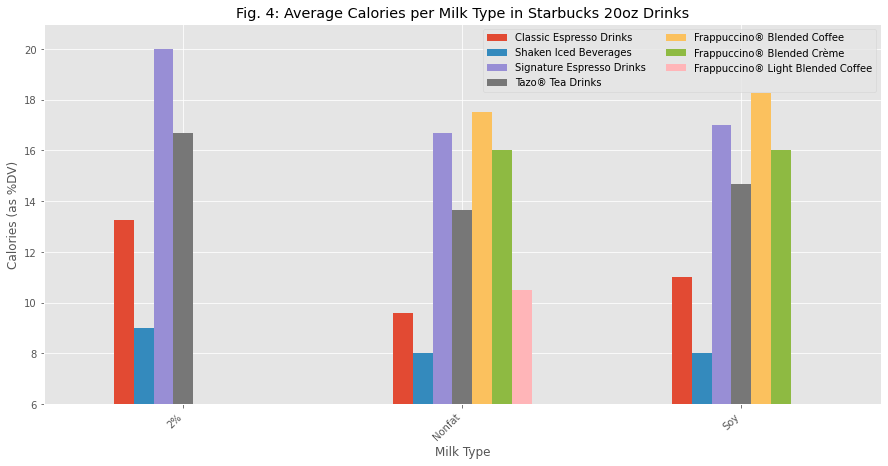

In [16]:
fig, ax = plt.subplots(figsize=(15,7))
method1.groupby(["milk_type", "category"]).mean()["calories_%dv"].unstack().plot(ax = ax, kind = "bar", ylim = 6)
ax.set_xlabel('Milk Type')
ax.set_ylabel('Calories (as %DV)')
ax.legend(ncol = 2)
plt.title("Fig. 4: Mean Calories per Milk Type in Starbucks 20oz Drinks")
plt.xticks(rotation = 45, ha ='right')

#### Conclusions: 
+ There are slight overall differences, notably between 2% milk versus nonfat or soy milk
+ The most visible difference exists for Classic Espresso Drinks, between 2% milk versus nonfat
+ But, any differences are difficult to visually compare with this graph type

---

#### Method 2: Use pivot_table() function and calculate calorie difference between milk types

In [17]:
method2 = pd.pivot_table(method1, index = ['milk_type', 'category'], values = 'calories_%dv')
method2

calories_%dv
milk_type category                                       
2%        Classic Espresso Drinks               13.250000
          Shaken Iced Beverages                  9.000000
          Signature Espresso Drinks             20.000000
          Tazo® Tea Drinks                      16.666667
Nonfat    Classic Espresso Drinks                9.600000
          Frappuccino® Blended Coffee           17.500000
          Frappuccino® Blended Crème            16.000000
          Frappuccino® Light Blended Coffee     10.500000
          Shaken Iced Beverages                  8.000000
          Signature Espresso Drinks             16.666667
          Tazo® Tea Drinks                      13.666667
Soy       Classic Espresso Drinks               11.000000
          Frappuccino® Blended Coffee           18.250000
          Frappuccino® Blended Crème            16.000000
          Shaken Iced Beverages                  8.000000
          Signature Espresso Drinks             17.000000
          Tazo® Tea Drinks                      14.666667

In [18]:
# Calculate difference between Soy and Nonfat
result1 = []
result1.append(method2.loc["Soy", "Classic Espresso Drinks"]["calories_%dv"] - method2.loc["Nonfat", "Classic Espresso Drinks"]["calories_%dv"])
result1.append(method2.loc["Soy", "Frappuccino® Blended Coffee"]["calories_%dv"] - method2.loc["Nonfat", "Frappuccino® Blended Coffee"]["calories_%dv"])
result1.append(method2.loc["Soy", "Frappuccino® Blended Crème"]["calories_%dv"] - method2.loc["Nonfat", "Frappuccino® Blended Crème"]["calories_%dv"])
result1.append(method2.loc["Soy", "Shaken Iced Beverages"]["calories_%dv"] - method2.loc["Nonfat", "Shaken Iced Beverages"]["calories_%dv"])
result1.append(method2.loc["Soy", "Signature Espresso Drinks"]["calories_%dv"] - method2.loc["Nonfat", "Signature Espresso Drinks"]["calories_%dv"])
result1.append(method2.loc["Soy", "Tazo® Tea Drinks"]["calories_%dv"] - method2.loc["Nonfat", "Tazo® Tea Drinks"]["calories_%dv"])

In [19]:
# Calculate difference between 2% and Soy
result2 = []
result2.append(method2.loc["2%", "Classic Espresso Drinks"]["calories_%dv"] - method2.loc["Soy", "Classic Espresso Drinks"]["calories_%dv"])
result2.append(method2.loc["2%", "Shaken Iced Beverages"]["calories_%dv"] - method2.loc["Soy", "Shaken Iced Beverages"]["calories_%dv"])
result2.append(method2.loc["2%", "Signature Espresso Drinks"]["calories_%dv"] - method2.loc["Soy", "Signature Espresso Drinks"]["calories_%dv"])
result2.append(method2.loc["2%", "Tazo® Tea Drinks"]["calories_%dv"] - method2.loc["Soy", "Tazo® Tea Drinks"]["calories_%dv"])

In [20]:
# Calculate difference between 2% and Nonfat
result3 = []
result3.append(method2.loc["2%", "Classic Espresso Drinks"]["calories_%dv"] - method2.loc["Nonfat", "Classic Espresso Drinks"]["calories_%dv"])
result3.append(method2.loc["2%", "Shaken Iced Beverages"]["calories_%dv"] - method2.loc["Nonfat", "Shaken Iced Beverages"]["calories_%dv"])
result3.append(method2.loc["2%", "Signature Espresso Drinks"]["calories_%dv"] - method2.loc["Nonfat", "Signature Espresso Drinks"]["calories_%dv"])
result3.append(method2.loc["2%", "Tazo® Tea Drinks"]["calories_%dv"] - method2.loc["Nonfat", "Tazo® Tea Drinks"]["calories_%dv"])

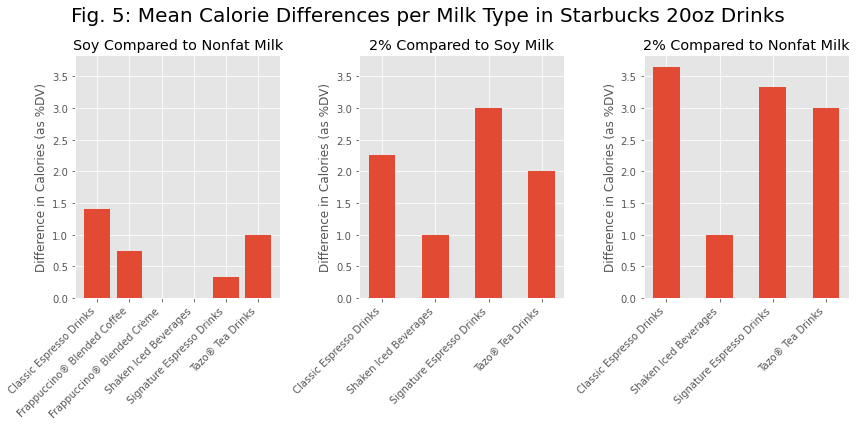

In [27]:
x1 = ["Classic Espresso Drinks", "Frappuccino® Blended Coffee", "Frappuccino® Blended Crème", "Shaken Iced Beverages", "Signature Espresso Drinks", "Tazo® Tea Drinks"]
x2 = ["Classic Espresso Drinks", "Shaken Iced Beverages", "Signature Espresso Drinks", "Tazo® Tea Drinks"]

plt.style.use('ggplot')
plt.figure(figsize=(12, 6))
plt.suptitle("Fig. 5: Mean Calorie Differences per Milk Type in Starbucks 20oz Drinks", fontsize = 20)

ax = plt.subplot(1,3,1)
plt.title("Soy Compared to Nonfat Milk")
plt.bar(x1, result1)
plt.ylabel("Difference in Calories (as %DV)")
plt.xticks(rotation = 45, ha ='right')

plt.subplot(1,3,2, sharey=ax)
plt.title("2% Compared to Soy Milk")
plt.bar(x2, result2, width = 0.5)
plt.ylabel("Difference in Calories (as %DV)")
plt.xticks(rotation = 45, ha ='right')

plt.subplot(1,3,3, sharey=ax)
plt.title("2% Compared to Nonfat Milk")
plt.bar(x2, result3, width = 0.5)
plt.ylabel("Difference in Calories (as %DV)")
plt.xticks(rotation = 45, ha ='right')

plt.tight_layout()

#### Conclusions: 
+ By showing only the (mean) differences versus flat (mean) readout comparisions, Fig. 5 provides a more readable analysis than Fig. 4
+ There is little difference between Soy and Nonfat milk
+ The greatest differences are seen with 2% versus Nonfat milk in Classic and Signature Espresso drinks